<a href="https://colab.research.google.com/github/playbase/ETL_Hive_Assignments/blob/main/classification_with_dl_19_may2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io

from google.colab import files

uploaded = files.upload()

In [4]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['e_commerce (1).csv']))
df.head()

NameError: name 'uploaded' is not defined

In [5]:
#EDA

In [6]:
df.isna().sum()

account length                          0
location code                           0
user id                                 0
credit card info save                   0
push status                             0
add to wishlist                         0
desktop sessions                        0
app sessions                            0
desktop transactions                    0
total product detail views             52
session duration                        0
promotion clicks                        0
avg order value                         0
sale product views                      0
discount rate per visited products      0
product detail view per app session    61
app transactions                        0
add to cart per session                 0
customer service calls                 59
churn                                   0
dtype: int64

In [7]:
x=df.drop(['churn'],axis=1)
y=df['churn']

In [8]:
#Preprocessing

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [10]:
cat=[]
con=[]

for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [11]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OrdinalEncoder())])

In [12]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['account length', 'location code', 'user id',
                                  'add to wishlist', 'desktop sessions',
                                  'app sessions', 'desktop transactions',
                                  'total product detail views',
                                  'session duration', 'promotion clicks',
                                  'avg order value', 'sale product views',
                                  'discount rate per visited products',
                                  'product detail view per app session',
                                  'app transactions', 'add to cart per session',
                                  'customer service calls']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OrdinalEncoder())]),
                                 ['credit card info save', 'push status'])])

In [13]:
x1=pd.DataFrame(pre.fit_transform(x),columns=pre.get_feature_names_out())
x1

,num_pipe__account length,num_pipe__location code,num_pipe__user id,num_pipe__add to wishlist,num_pipe__desktop sessions,num_pipe__app sessions,num_pipe__desktop transactions,num_pipe__total product detail views,num_pipe__session duration,num_pipe__promotion clicks,num_pipe__avg order value,num_pipe__sale product views,num_pipe__discount rate per visited products,num_pipe__product detail view per app session,num_pipe__app transactions,num_pipe__add to cart per session,num_pipe__customer service calls,cat_pipe__credit card info save,cat_pipe__push status
0,0.676489,-0.523603,0.285359,1.234883,1.564550,1.557193,-0.020265,0.474708,-0.079666,-0.658138,0.866743,-0.465494,0.866029,-0.088435,-0.601195,-0.085690,-0.421808,0.0,1.0
1,0.149065,-0.523603,-0.105965,1.307948,-0.327130,-0.384977,-0.020265,1.128760,-0.099387,0.145038,1.058571,0.147825,1.059390,1.248892,-0.601195,1.241169,-0.421808,0.0,1.0
2,0.902529,-0.523603,-0.598534,-0.591760,1.160502,1.125600,-1.639456,0.675955,-1.578480,0.496427,-0.756869,0.198935,-0.755571,0.706732,0.211534,0.697156,-1.187125,0.0,0.0
3,-0.428590,-0.688834,0.049915,-0.591760,2.188988,2.204583,-2.796021,-1.487447,-2.742033,-0.607939,-0.078551,-0.567714,-0.078806,-1.317330,1.024263,-1.306401,0.343509,1.0,0.0
4,-0.654629,-0.523603,-1.600987,-0.591760,-0.235301,-0.277078,-0.945517,0.625643,-1.046007,1.098809,-0.276311,1.067803,-0.276562,-0.052291,-0.601195,-0.045885,1.108826,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,-0.523603,1.449212,2.038605,-0.437325,-0.384977,0.211048,-1.185577,0.295038,1.299603,1.547039,-0.874374,1.547188,-0.124579,0.617898,-0.125496,0.343509,0.0,1.0
3329,-0.830437,-0.523603,-0.156653,-0.591760,0.940112,0.909803,-0.945517,0.021903,-0.947401,-2.264489,-0.189297,1.170023,-0.188670,-0.233011,-0.194831,-0.231645,1.108826,0.0,0.0
3330,-1.835055,1.718817,-1.667974,-0.591760,0.021821,0.046617,1.830239,0.424396,1.734688,-2.113894,-0.177431,-0.465494,-0.175486,1.393468,0.617898,1.387123,0.343509,0.0,0.0
3331,2.082955,1.718817,-0.363811,-0.591760,0.627893,0.586108,-0.714204,0.223150,-0.809352,-0.808733,-1.219628,1.885562,-1.221396,-1.895634,2.243356,-1.876950,0.343509,1.0,0.0


In [14]:
#Spliting Data into train and test

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=23)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [17]:
nn=Sequential()

In [18]:
#Neurone Architecture
#input layer
nn.add(Dense(300,input_dim=x_train.shape[1],activation='relu',kernel_initializer='he_normal'))
nn.add(Dropout(0.2))

#hidden layer
nn.add(Dense(400,activation='relu'))
nn.add(Dropout(0.5))

nn.add(Dense(400,activation='relu'))
nn.add(Dropout(0.5))

nn.add(Dense(300,activation='relu'))
nn.add(Dropout(0.5))

#output Layer
nn.add(Dense(1,activation='sigmoid'))

In [19]:
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
#Fit the model
hist=nn.fit(x_train,y_train,batch_size=128,validation_split=0.15,epochs=30)

Epoch 1/30
18/18 [==============================] - 6s 65ms/step - loss: 0.5475 - accuracy: 0.8155 - val_loss: 0.3851 - val_accuracy: 0.8650
Epoch 2/30
18/18 [==============================] - 1s 34ms/step - loss: 0.4173 - accuracy: 0.8517 - val_loss: 0.3877 - val_accuracy: 0.8775
Epoch 3/30
18/18 [==============================] - 1s 36ms/step - loss: 0.3875 - accuracy: 0.8566 - val_loss: 0.3406 - val_accuracy: 0.8925
Epoch 4/30
18/18 [==============================] - 1s 30ms/step - loss: 0.3648 - accuracy: 0.8641 - val_loss: 0.3441 - val_accuracy: 0.8925
Epoch 5/30
18/18 [==============================] - 1s 48ms/step - loss: 0.3531 - accuracy: 0.8716 - val_loss: 0.3000 - val_accuracy: 0.8950
Epoch 6/30
18/18 [==============================] - 1s 36ms/step - loss: 0.3220 - accuracy: 0.8835 - val_loss: 0.3003 - val_accuracy: 0.8950
Epoch 7/30
18/18 [==============================] - 0s 16ms/step - loss: 0.3084 - accuracy: 0.8853 - val_loss: 0.2958 - val_accuracy: 0.8925
Epoch 8/30
18

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.plot(hist.history['loss'],c='red')

NameError: name 'hist' is not defined

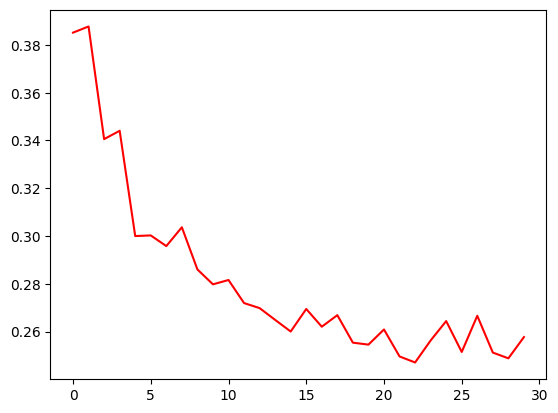

In [23]:
plt.plot(hist.history['val_loss'],c='red')

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
# Training Data Evaluation

In [26]:
y_pred_train=nn.predict(x_train)
y_pred_train

84/84 [==============================] - 1s 8ms/step


array([[0.02194275],
       [0.0279092 ],
       [0.15796438],
       ...,
       [0.42809042],
       [0.08577795],
       [0.0060832 ]], dtype=float32)

In [1]:
tr_err=[]
for i in y_pred_train:
    if i>0.5:
        tr_err.append(1)
    else:
        tr_err.append(0)

NameError: name 'y_pred_train' is not defined

In [ ]:
acc=accuracy_score(tr_err,y_train)
cnf=confusion_matrix(tr_err,y_train)
clf=classification_report(tr_err,y_train)

print('Accuracy:',acc)
print('Classification Report:\n',clf)
print('Confusion Matrix:\n',cnf)

In [30]:
y_pred_test=nn.predict(x_test)


21/21 [==============================] - 0s 8ms/step


In [34]:
ts_err=[]
for i in y_pred:
    if i>0.5:
        ts_err.append(1)
    else:
        ts_err.append(0)

In [31]:
# Testing Data Evaluation

In [ ]:
acc1=accuracy_score(ts_err,y_pred_test)
cnf1=confusion_matrix(ts_err,y_pred_test)
clf1=classification_report(ts_err,y_pred_test)

print('Accuracy:',acc1)
print('Classification Report:\n',clf1)
print('Confusion Matrix:\n',cnf1)